<a href="https://colab.research.google.com/github/dc3347/CompAspectsofRobotics/blob/main/Robotics_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import math
import random
from scipy import optimize
import sympy
from sympy import *
from sympy.vector import gradient

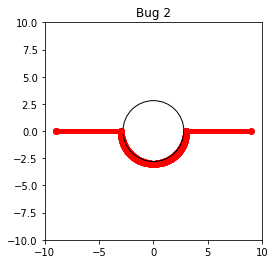

In [85]:
# Problem 1a


# Make data.
X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)

# Change inputs here to run program
#input = [((3,0),5), ((-6,0),2)]
#input = [((0,3),3)]
input = [((0,0),3)]


# initializing start, goal, plot
Q_start = -9
Q_goal = 9
toPlotX = []
toPlotX.append(Q_start)

# for storing hit and leave points
leave = [Q_start]
hit = []

#for circle boundary
boundX = []
boundY = []

# iterate through each obstacle
for obstacle in input:
  a = obstacle[0][0] 
  b = obstacle[0][1]
  r = obstacle[1]
  theta = np.linspace(0, 2*np.pi, 1000)  
  
  # distance from point to center of obstacle
  dist = np.sqrt(np.add((X-a)**2, b**2))

  for i in dist:
    for elem in i:
      if (elem <= r):
        x =(r*np.cos(theta))+a # x-coord of circle
        y = (r*np.sin(theta))+b # y-coord of circle
        leave.append(float(abs(math.sqrt(r**2 - b**2)) + a))
        hit.append(float((-1)*abs(math.sqrt(r**2 - b**2)) + a)) 
  
  left = bool(random.getrandbits(1))
  if left:
    #print("left")
    for i in range(len(x)):
      if y[i]>=0:
        # add points to boundary
        boundX.append(x[i])
        boundY.append(y[i])
  elif not left:
    #print("right")
    for i in range(len(x)):
      if y[i]<=0:
        # add points to boundary
        boundX.append(x[i])
        boundY.append(y[i])

# adding the goal as the last hit point
hit.append(Q_goal)

fig, ax = plt.subplots()

# process and sort the data
hit = list(set(hit))
hit.sort()
leave = list(set(leave))
leave.sort()

for i in range(0, len(leave)):
  mline =[leave[i]]
  mline.append(hit[i])
  #print(mline)
  yline=[0 for i in mline]
  ax.plot(mline,yline,color='red', linewidth=5.0)

# adds points to be plotted
toPlotX += hit + leave 
toPlotY = [0 for i in toPlotX]
toPlotX += boundX
toPlotY += boundY

ax.scatter(toPlotX, toPlotY, color = "red") 
ax.set_title("Bug 2") 

ax.set_aspect(1)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# adds all the obstacles to the input
for obstacle in input:
  ax.add_patch(plt.Circle(Point(obstacle[0][0],obstacle[0][1]),obstacle[1]-0.2, fill = False))

plt.show() 



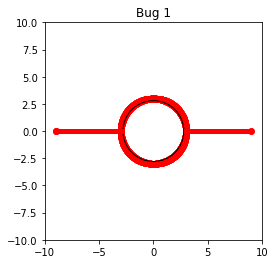

In [81]:
# Problem 1a
# bug 1

# Make data.
X = np.arange(-5, 5.25, 0.25)
Y = np.arange(-5, 5.25, 0.25)
X, Y = np.meshgrid(X, Y)

# Change inputs here to run program
#input = [((3,0),5), ((-6,1),2)]
# input = [((0,3),3)]
input = [((0,0),3)]

# initializing start, goal, plot
Q_start = -9
Q_goal = 9
toPlotX = []
toPlotX.append(Q_start)

# for storing hit and leave points
leave_x = [Q_start] # min dist from robot to goal
leave_y = [0]
hit = [] 

#for circle boundary
boundX = []
boundY = []

# iterate through each obstacle
for obstacle in input:
  a = obstacle[0][0] 
  b = obstacle[0][1]
  r = obstacle[1]
  theta = np.linspace(0, 2*np.pi, 1000)  
  
  # distance from point to center of obstacle
  
  dist = np.sqrt(np.add((X-a)**2, b**2))
  for i in dist:
    for elem in i:
      if (elem <= r):
        x =(r*np.cos(theta))+a # x-coord of circle
        y = (r*np.sin(theta))+b # y-coord of circle
        hit.append(float((-1)*abs(math.sqrt(r**2 - b**2)) + a)) 
  
  left = bool(random.getrandbits(1))
  loc_closest = 1000

  if left:
    #print("left")
    for i in range(len(x)):
      # add all obs points
      boundX.append(x[i])
      boundY.append(y[i])
      if y[i]>0:
        # find closest point to goal and set as leave point
        dis = np.sqrt(np.add((x[i]-Q_goal)**2, y[i]**2))
        if dis<loc_closest:
          loc_closest = dis
          pt = (x[i],y[i])
    leave_x.append(pt[0])
    leave_y.append(pt[1])

  elif not left:
    #print("right")
    for i in range(len(x)):
      boundX.append(x[i])
      boundY.append(y[i])
      if y[i]<0:
        # find closest point on boundary to goal and set as leave point
        dis = np.sqrt(np.add((x[i]-Q_goal)**2, y[i]**2))
        if dis<loc_closest:
          loc_closest = dis
          pt = (x[i],y[i])
    leave_x.append(pt[0])
    leave_y.append(pt[1])

# adding the goal as the last hit point
hit.append(Q_goal)

fig, ax = plt.subplots()

# process and sort the data
hit = list(set(hit))
hit.sort()
leave_x = list(set(leave_x))
leave_y = list(set(leave_y))
leave_x.sort()
leave_y.sort()


for i in range(0, len(leave)):
  mline =[leave[i]]
  mline.append(hit[i])
  yline=[0 for i in range(len(mline))]
  ax.plot(mline,yline,color='red', linewidth=5.0)

# adds points to be plotted
toPlotX += hit + leave_x
toPlotY = [0 for i in toPlotX]
toPlotX += boundX
toPlotY += boundY

ax.scatter(toPlotX, toPlotY, color = "red") 
ax.set_title("Bug 1") 

ax.set_aspect(1)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)

# adds all the obstacles to the input
for obstacle in input:
  ax.add_patch(plt.Circle(Point(obstacle[0][0],obstacle[0][1]),obstacle[1]-0.2, fill = False))



ax.plot()
plt.show() 

